In [1]:
# 5. Bandstructure

In [2]:
## 5.4 Effect of spin–orbit coupling

In [3]:
%reset -f
%matplotlib inline
from pylab import *

In [4]:
k=linspace(-1,1,21); a=2; b=1;
E1=sqrt((a**2)+(b**2)+(2*a*b*cos(pi*k)));

soa=0.3787/3; soc=0.0129/3; Esa=-8.3431; Epa=1.0414; Esc=-2.6569; Epc=3.6686; Esea=8.5914; Esec=6.7386;
Vss=-6.4513; Vxx=1.9546; Vxy=5.0779; Vsapc=4.4800; Vpasc=5.7839; Vseapc=4.8422;
Vpasec=4.8077;

d1=array([0,0,0])/2; d2=array([0,-1,-1])/2; d3=array([-1,0,-1])/2; d4=array([-1,-1,0])/2;

In [5]:
#L-direction
l=1; m=1; n=1; kmax=pi; Nt=101;

#Initializing arrays
E=zeros((Nt,20)); X=zeros((Nt)); X1=zeros((Nt)); Y=zeros((2*Nt,20)); Z=zeros((2*Nt));

for Nk in range(0,Nt):
    k=array([l,m,n])*kmax*(Nk)/(Nt-1);
    p1=exp(1j*sum(k*d1)); p2=exp(1j*sum(k*d2));
    p3=exp(1j*sum(k*d3)); p4=exp(1j*sum(k*d4));
    g0=(p1+p2+p3+p4)/4; g1=(p1+p2-p3-p4)/4;
    g2=(p1-p2+p3-p4)/4; g3=(p1-p2-p3+p4)/4;
    h=[[Esa/2,Vss*g0,0,0,0,Vsapc*g1,Vsapc*g2,Vsapc*g3,0,0],[0,Esc/2,-Vpasc*conj(g1),-Vpasc*conj(g2),-Vpasc*conj(g3),0,0,0,0,0],[0,0,Epa/2,0,0,Vxx*g0,Vxy*g3,Vxy*g2,0,-Vpasec*g1],[0,0,0,Epa/2,0,Vxy*g3,Vxx*g0,Vxy*g1,0,-Vpasec*g2],[0,0,0,0,Epa/2,Vxy*g2,Vxy*g1,Vxx*g0,0,-Vpasec*g3],[0,0,0,0,0,Epc/2,0,0,Vseapc*(g1),0],[0,0,0,0,0,0,Epc/2,0,Vseapc*(g2),0],[0,0,0,0,0,0,0,Epc/2,Vseapc*(g3),0],[0,0,0,0,0,0,0,0,Esea/2,0],[0,0,0,0,0,0,0,0,0,Esec/2]];
    H=vstack((hstack((h+transpose(h),zeros((10,10)))),hstack((zeros((10,10)),h+transpose(h)))));
    hso=zeros((20,20),dtype=cfloat);
    hso[2,3]=-1j*soa; hso[2,14]=soa;
    hso[3,14]=-1j*soa;
    hso[4,12]=-soa; hso[4,13]=1j*soa;
    hso[5,8]=-1j*soc; hso[5,17]=soc;
    hso[6,17]=-1j*soc;
    hso[7,17]=-soc; hso[7,16]=1j*soc;
    hso[12,13]=1j*soa;
    hso[15,16]=1j*soc;
    Hso=hso+(transpose(hso));
    [D,V]=eigh(H+Hso);
    E[Nk,:]=D;
    X[Nk]=-(Nk)/(Nt-1); #L-direction
    
Y[0:Nt,:]=E;
Z[0:Nt]=X;

In [6]:
#X-direction
l=1; m=0; n=0; kmax=2*pi; Nt=101;

#Initializing arrays
E=zeros((Nt,20)); X=zeros((Nt)); X1=zeros((Nt)); 

for Nk in range(0,Nt):
    k=array([l,m,n])*kmax*(Nk)/(Nt-1);
    p1=exp(1j*sum(k*d1)); p2=exp(1j*sum(k*d2));
    p3=exp(1j*sum(k*d3)); p4=exp(1j*sum(k*d4));
    g0=(p1+p2+p3+p4)/4; g1=(p1+p2-p3-p4)/4;
    g2=(p1-p2+p3-p4)/4; g3=(p1-p2-p3+p4)/4;
    h=[[Esa/2,Vss*g0,0,0,0,Vsapc*g1,Vsapc*g2,Vsapc*g3,0,0],[0,Esc/2,-Vpasc*conj(g1),-Vpasc*conj(g2),-Vpasc*conj(g3),0,0,0,0,0],[0,0,Epa/2,0,0,Vxx*g0,Vxy*g3,Vxy*g2,0,-Vpasec*g1],[0,0,0,Epa/2,0,Vxy*g3,Vxx*g0,Vxy*g1,0,-Vpasec*g2],[0,0,0,0,Epa/2,Vxy*g2,Vxy*g1,Vxx*g0,0,-Vpasec*g3],[0,0,0,0,0,Epc/2,0,0,Vseapc*(g1),0],[0,0,0,0,0,0,Epc/2,0,Vseapc*(g2),0],[0,0,0,0,0,0,0,Epc/2,Vseapc*(g3),0],[0,0,0,0,0,0,0,0,Esea/2,0],[0,0,0,0,0,0,0,0,0,Esec/2]];
    H=vstack((hstack((h+transpose(h),zeros((10,10)))),hstack((zeros((10,10)),h+transpose(h)))));
    hso=zeros((20,20),dtype=cfloat);
    hso[2,3]=-1j*soa; hso[2,14]=soa;
    hso[3,14]=-1j*soa;
    hso[4,12]=-soa; hso[4,13]=1j*soa;
    hso[5,8]=-1j*soc; hso[5,17]=soc;
    hso[6,17]=-1j*soc;
    hso[7,17]=-soc; hso[7,16]=1j*soc;
    hso[12,13]=1j*soa;
    hso[15,16]=1j*soc;
    Hso=hso+(transpose(hso));
    [D,V]=eigh(H+Hso);
    E[Nk,:]=D;
    X1[Nk]=(Nk)/(Nt-1); #X-direction

Y[Nt:2*Nt+1,:]=E;
Z[Nt:2*Nt+1]=X1;

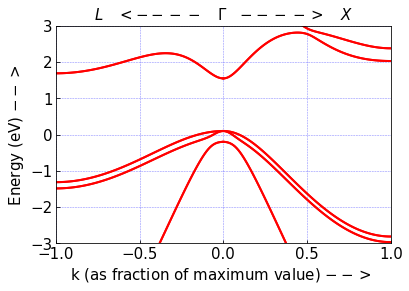

In [7]:
plot(Z[0:Nt],Y[0:Nt,:],'r',lw=2)
plot(Z[Nt:2*Nt+1],Y[Nt:2*Nt+1,:],'r',lw=2)
xlabel('k (as fraction of maximum value) $-->$ ',fontsize=15)
ylabel(' Energy (eV) $-->$ ',fontsize=15)
xlim(-1,1)
ylim(-3,3)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('$L$   $<----$   $\Gamma$   $---->$   $X$',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

#Note: X-axis from 0 to +1 represents the -X direction
#while the section from 0 to -1 represents the -L direction